In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import os,glob
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:

from matplotlib import cm

# define defaut parameters


In [6]:
verbose = True

In [7]:
roi_size = 24
doBck = True
threshold = 0.

# Set which data to load

In [72]:
cam = "r3"
rerun = "ginga/detrend/"
experimentId = 1109 #1108
roi_size = 24

# Set folder according place either cluster, laptop

In [73]:
if True:
    imgPath = '/data/drp/analysis/sm3/'
    dataPath = imgPath
    drpPath = "/data/drp"    
    repo = "sps"

In [74]:
outpath = ''
outpath = "output\\" if outpath is None else outpath



# Read data CSV files for all experimentIds

In [75]:
csvPath = imgPath+"Exp"+str(experimentId)+"/"+rerun+"_roi"+str(roi_size)+"/doBck"+str(doBck)+"/"
if not os.path.exists(csvPath):
    csvPath = imgPath+"Exp"+str(experimentId)+"/"+rerun+"/"+"roi"+str(roi_size)+"/doBck"+str(doBck)+"/"

dataPath = csvPath

    
searchFile = f"{csvPath}Imquality_{cam}_Exp{experimentId}*"
print(searchFile)
files = []
files.extend(glob.glob(searchFile))

if len(files) != 0 :
    if verbose:
        print(*files, sep="\n")
    if True:
        alldata = pd.concat(map(pd.read_csv,files)).reset_index().sort_values(by="motor1")
    

/data/drp/analysis/sm3/Exp1109/ginga/detrend//roi24/doBckTrue/Imquality_r3_Exp1109*
/data/drp/analysis/sm3/Exp1109/ginga/detrend//roi24/doBckTrue/Imquality_r3_Exp1109_35457_20220505T14h14.csv
/data/drp/analysis/sm3/Exp1109/ginga/detrend//roi24/doBckTrue/Imquality_r3_Exp1109_35469_20220505T14h14.csv
/data/drp/analysis/sm3/Exp1109/ginga/detrend//roi24/doBckTrue/Imquality_r3_Exp1109_35476_20220505T14h14.csv
/data/drp/analysis/sm3/Exp1109/ginga/detrend//roi24/doBckTrue/Imquality_r3_Exp1109_35465_20220505T14h14.csv
/data/drp/analysis/sm3/Exp1109/ginga/detrend//roi24/doBckTrue/Imquality_r3_Exp1109_35471_20220505T14h14.csv
/data/drp/analysis/sm3/Exp1109/ginga/detrend//roi24/doBckTrue/Imquality_r3_Exp1109_35462_20220505T14h14.csv
/data/drp/analysis/sm3/Exp1109/ginga/detrend//roi24/doBckTrue/Imquality_r3_Exp1109_35455_20220505T14h14.csv
/data/drp/analysis/sm3/Exp1109/ginga/detrend//roi24/doBckTrue/Imquality_r3_Exp1109_35474_20220505T14h14.csv
/data/drp/analysis/sm3/Exp1109/ginga/detrend//roi24/

In [76]:
visits = alldata.visit.sort_values().unique()
print(visits)

[35453 35454 35455 35456 35457 35458 35459 35460 35461 35462 35463 35464
 35465 35466 35467 35468 35469 35470 35471 35472 35473 35474 35475 35476]


In [82]:
imdata = alldata[alldata.visit == visits[0]].sort_values(by=['fiber'])

In [83]:
imdata.columns

Index(['index', 'Unnamed: 0', 'px', 'py', 'oid_x', 'oid_y', 'EE3', 'TotEE3',
       'EE5', 'TotEE5', 'peak', 'fiber', 'wavelength', 'element', 'sep_thresh',
       'sep_npix', 'sep_tnpix', 'sep_xmin', 'sep_xmax', 'sep_ymin', 'sep_ymax',
       'sep_px', 'sep_py', 'sep_x2', 'sep_y2', 'sep_xy', 'sep_errx2',
       'sep_erry2', 'sep_errxy', 'sep_a', 'sep_b', 'sep_theta', 'sep_cxx',
       'sep_cyy', 'sep_cxy', 'sep_cflux', 'sep_flux', 'sep_cpeak',
       'sep_brightness', 'sep_xcpeak', 'sep_ycpeak', 'sep_xpeak', 'sep_ypeak',
       'sep_flag', 'sep_cx', 'sep_cy', 'filename', 'visit', 'xm1pos', 'xm2pos',
       'xm3pos', 'motor1', 'motor2', 'motor3', 'fcaFocus', 'fcaX', 'fcaY',
       'fcaZ', 'ccdTemp', 'detBoxTemp', 'cam', 'obsdate', 'experimentId'],
      dtype='object')

In [84]:
waves = imdata.wavelength.sort_values().unique()
print(waves)
fibers =  imdata.fiber.sort_values().unique()
print(fibers)

[660.0775 693.1379 717.5915 724.7163 808.468  830.2606 846.5682 892.195
 915.1183]
[  2  63 192 255 339 401 464 525 587 650]


In [124]:
savePlotFile = csvPath + f"{cam.upper()}_ExpId_{str(int(experimentId))}_visit{visits[0]}"

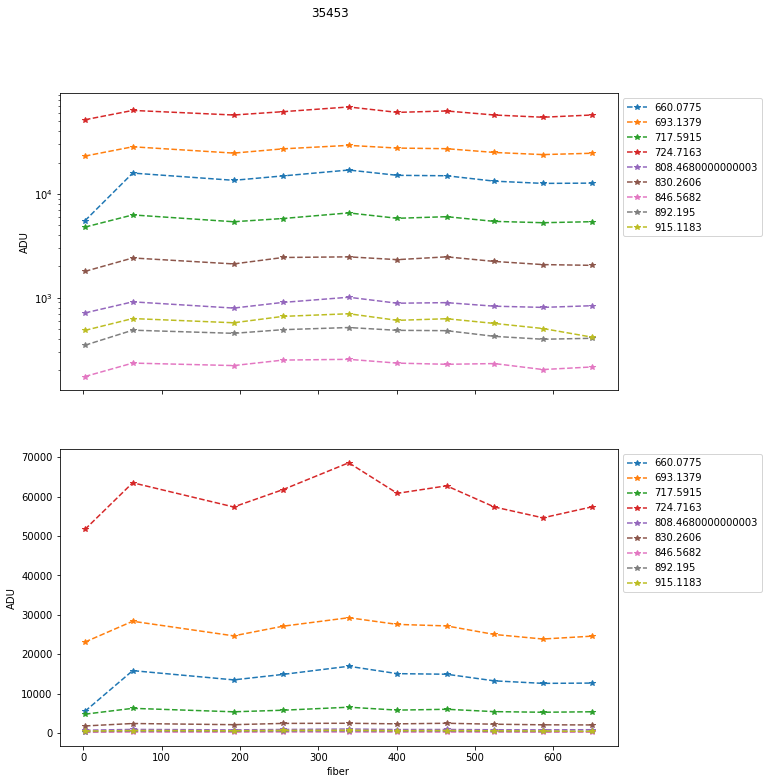

In [125]:
plotPeaksBrightness(imdata, doSave=True, plot_title=visits[0], savePlotFile=savePlotFile)